This question refers to the Alzheimer's and cancer metadata stored in Exercise 1. It is not intended to involve any new queries to PubMed nor to make statements about PubMed beyond that of the papers whose data was obtained.

What fraction of the Alzheimer's papers have no MeSH terms? (2 points) What fraction of the cancer papers have no MeSH terms? (2 points)

In [2]:
import json 
with open('pubmed_articles.json') as f:
    data = json.load(f)

In [4]:
# Split all articles into separate dictionaries according to the queries 
alzheimer_data = {pmid: data for pmid, data in data.items() if (data["query"] == "Alzheimer") or (data["query"] == "Alzheimer/Cancer")}
cancer_data = {pmid: data for pmid, data in data.items() if (data["query"] == "Cancer") or (data["query"] == "Alzheimer/Cancer")}
overlap_data = {pmid: data for pmid, data in data.items() if data["query"] == "Alzheimer/Cancer"}

In [7]:
# Find out how many alzheimer's papers have no mesh terms in fraction
alzheimer_no_mesh = {pmid: data for pmid, data in alzheimer_data.items() if data["mesh"] == []}
# Find the fraction
len(alzheimer_no_mesh)/1000 

0.164

In [5]:
# Find out how many cancer papers have no mesh terms in fraction
cancer_no_mesh = {pmid: data for pmid, data in cancer_data.items() if data["mesh"] == []}
len(cancer_no_mesh)/1000

0.758

In [8]:
# Compare the relative fraction of two groups of papers with no mesh terms 
0.758/0.164

4.621951219512195

Comment on how the fractions compare. (1 point; i.e. if they're essentially the same, do you think that's a coincidence? If they're different, do you have any theories why?)

Cancer papers with no mesh terms are almost 5 times as Alzhiemer's papers with no mesh terms. This large difference might imply that cancer papers have fewer standardized terms because it is a more general topic, whereas Alzhiemer's is a specific disease. 

What are the 10 most common MeSH terms for the Alzheimer's papers whose metadata you found in Exercise 1? (2 points) Provide a graphic illustrating their relative frequency. (3 points)

In [9]:
# Extract the mesh term list
alzheimer_with_mesh = {pmid: data for pmid, data in alzheimer_data.items() if data["mesh"] != []}
alzheimer_with_mesh_list = list(alzheimer_with_mesh.values())
alzheimer_mesh_list = [x["mesh"] for x in alzheimer_with_mesh_list]

In [11]:
from collections import Iterable
from collections import Counter
# Convert a nested list into a one-dimensional list 
# Reference: https://stackoverflow.com/questions/17485747/how-to-convert-a-nested-list-into-a-one-dimensional-list-in-python
def flatten(lis):
    # Loop through all mesh terms
     for item in lis:
        # If the mesh terms is nested inside another list
         if isinstance(item, Iterable) and not isinstance(item, str):
            # Convert the 2D list to 1D
            for x in flatten(item):
                # Return the mesh term
                yield x
         else: 
            # Return those that are not in the 2D list       
            yield item
alz_mesh_terms = list(flatten(alzheimer_mesh_list))

# Find the most common mesh terms # Reference: https://www.delftstack.com/howto/python/python-counter-most-common/ 
c_alz = Counter(alz_mesh_terms)
most_common_alz_meshTerms = c_alz.most_common(10)
most_common_alz_meshTerms

C:\Users\kryst\AppData\Local\Temp/ipykernel_39744/858019408.py:1: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import Iterable


[('Humans', 701),
 ('Alzheimer Disease', 699),
 ('Male', 351),
 ('Female', 299),
 ('Aged', 285),
 ('Animals', 273),
 ('Amyloid beta-Peptides', 211),
 ('Brain', 190),
 ('Aged, 80 and over', 170),
 ('Cognitive Dysfunction', 156)]

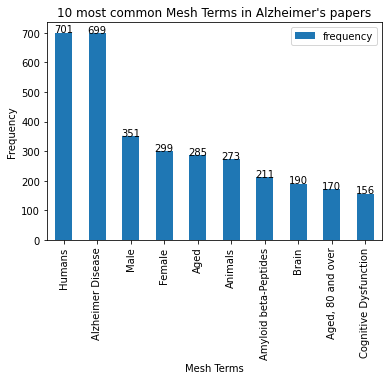

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

alz_df = pd.DataFrame(most_common_alz_meshTerms, columns=['word', 'frequency'])
alz_df.plot(kind='bar', x='word')
plt.ylabel('Frequency')
plt.xlabel('Mesh Terms')
plt.title("10 most common Mesh Terms in Alzheimer's papers")

for x,y in enumerate(alz_df.frequency):
    plt.text(x, y+1, '%.0f'%y, ha = 'center')


What are the 10 most common MeSH terms for the cancer papers whose metadata you found in Exercise 1? (2 points) Provide a graphic illustrating their relative frequency. (3 points)

In [14]:
# Extract the mesh term list
cancer_with_mesh = {pmid: data for pmid, data in cancer_data.items() if data["mesh"] != []}
cancer_with_mesh_list = list(cancer_with_mesh.values())
cancer_mesh_list = [x["mesh"] for x in cancer_with_mesh_list]

# Convert a nested list into a one-dimensional list 
can_mesh_terms = list(flatten(cancer_mesh_list))

# Find the most common mesh terms
c_can = Counter(can_mesh_terms)
most_common_can_meshTerms = c_can.most_common(10)
most_common_can_meshTerms

[('Humans', 222),
 ('Female', 96),
 ('Male', 63),
 ('Middle Aged', 63),
 ('Aged', 54),
 ('Adult', 52),
 ('Animals', 33),
 ('Neoplasms', 27),
 ('Retrospective Studies', 27),
 ('Aged, 80 and over', 21)]

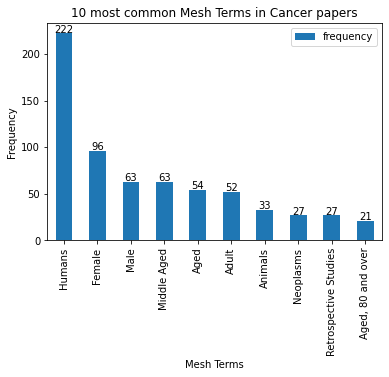

In [11]:
can_df = pd.DataFrame(most_common_can_meshTerms, columns=['word', 'frequency'])
can_df.plot(kind='bar', x='word')
plt.ylabel('Frequency')
plt.xlabel('Mesh Terms')
plt.title("10 most common Mesh Terms in Cancer papers")

for x,y in enumerate(can_df.frequency):
    plt.text(x, y+1, '%.0f'%y, ha = 'center')

Make a labeled table with rows for each of the top 5 MeSH terms from the Alzheimer's query and columns for each of the top 5 MeSH terms from the cancer query. For the values in the table, provide the count of papers (combined, from both sets) having both the matching MeSH terms. (5 points)

In [15]:
# Find the top 5 mesh terms in the alzheimer mesh terms and store in a dictionary
alz_top5 = c_alz.most_common(5)
alz_top5

[('Humans', 701),
 ('Alzheimer Disease', 699),
 ('Male', 351),
 ('Female', 299),
 ('Aged', 285)]

In [16]:
# Find the top 5 mesh terms in the cancer mesh terms and store in a dictionary
can_top5 = c_can.most_common(5)
can_top5

[('Humans', 222),
 ('Female', 96),
 ('Male', 63),
 ('Middle Aged', 63),
 ('Aged', 54)]

In [17]:
import numpy as np
# Make an empty 5x5 matrix 
matrix = np.zeros((5,5))
matrix

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [18]:
# Loop through the two dimensions of matrix 
for i in range(5):
    for j in range(5):
        count = 0
        for k in data: # Add mesh terms' counts for Alzhimer's and Cancer papers into the matrix 
            if (alz_top5[i][0] in data[k]["mesh"]) and (can_top5[j][0] in data[k]["mesh"]):
                count +=1
            matrix[i][j] = count
matrix = matrix.astype(int)
matrix

array([[922, 381, 369, 208, 338],
       [584, 236, 281, 109, 227],
       [369, 327, 413, 180, 288],
       [381, 394, 327, 192, 295],
       [338, 295, 288, 175, 338]])

In [21]:
top5_mesh_df = pd.DataFrame(matrix,
                  index = [tup[0] for tup in alz_top5],
                  columns= [tup[0] for tup in can_top5])   
top5_mesh_df 

,Humans,Female,Male,Middle Aged,Aged
Humans,922,381,369,208,338
Alzheimer Disease,584,236,281,109,227
Male,369,327,413,180,288
Female,381,394,327,192,295
Aged,338,295,288,175,338


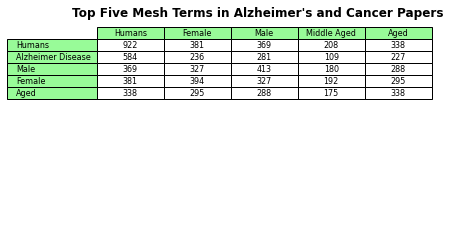

In [17]:
# Generate a table of top five mesh terms from both papers using maplotlib 
fig, ax = plt.subplots(1,1) 
# Hide the axis
ax.set_axis_off() 
table = ax.table( 
    cellText = matrix,  
    rowLabels = [tup[0] for tup in alz_top5],  
    colLabels = [tup[0] for tup in can_top5], 
    rowColours =["palegreen"] * 10,  
    colColours =["palegreen"] * 10, 
    cellLoc ='center',  
    loc ='upper left')         
ax.set_title("Top Five Mesh Terms in Alzheimer's and Cancer Papers", 
             fontweight ="bold") 
   
plt.show() 